# Challenge: Amazon Reviews

Use one of the [following datasets](http://jmcauley.ucsd.edu/data/amazon/) to perform sentiment analysis on the given Amazon reviews. Pick one of the "small" datasets that is a reasonable size for your computer. The goal is to create a model to algorithmically predict if a review is positive or negative just based on its text. Try to see how these reviews compare across categories. Does a review classification model for one category work for another?

Dataset: Grocery and Gourmet Food Ratings (1,297,156 ratings)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [ ]:
grocery = 'Grocery_and_Gourmet_Food_5.json'
with open(grocery) as grocery_load:
    all_entries = grocery_load.readlines()
    
parsable_data = "[" + ','.join(all_entries).replace('\n', '') + "]"


amazon = pd.read_json(parsable_data, orient='columns', typ='frame')
amazon.head()

In [ ]:
amazon.drop(['asin', 'helpful', 'reviewTime', 'reviewerID', 'reviewerName',
             'summary', 'unixReviewTime'], axis=1, inplace=True)

In [ ]:
amazon.info()

## Getting the data into shape

In [5]:
import string

# Creating features

# Remove capitals
amazon.reviewText = amazon.reviewText.apply(lambda x: x.lower())

# Remove stops 
# import nltk
# stem
# can do sentiment analysis

# Load negative words
words = pd.read_csv('negative-words.txt', sep='\t', header= None,
                    comment=';', encoding='latin-1', names=['colname1'])
words_positive = pd.read_csv('positive-words.txt', sep='\t', header= None,
                             comment=';', encoding='latin-1', names=['colname1'])

# Dropping duplicate words (e.g. bull**** and bull----)
words = words.loc[words.colname1 != 'bull****', :]
words = words.loc[words.colname1 != 'far-fetched', :]
words = words.loc[words.colname1 != 'f**k', :]


# Remove punctuation
# There must be an easier way!
def remove_punctuation(value):
    result = ""
    for c in value:
        # If char is not punctuation, add it to the result.
        if c not in string.punctuation:
            result += c
    return result
amazon.reviewText = amazon.reviewText.apply(lambda x: remove_punctuation(x))

In [6]:
def featuresSet(words, amazon):
    ''' Function takes df of words, and creates features if
    that word is in amazon review.
    Keeps only features with highest counts.
    Returns new feature dataset
    '''
    featureslist = []
    for i in range(0, 4801, 50):
        # Only create 50 features at a time
        features = amazon.loc[:, ['reviewText']]
        for word in words.colname1[i-50:i]:
            # Create column for each word (1 if word in review)
            features[word] = features['reviewText'].str.contains(" " + word + " ")
        # Create count of word appearance
        topwords = features.sum(axis=0, numeric_only=True).sort_values(ascending=False)
        # Select only features with more than 1,000 appearances
        topwords = list(topwords.index[topwords>500])
        features = features.loc[:, features.columns.isin(topwords)]
        print("Done for: ", i)
        featureslist.append(features)
    return featureslist
            


In [7]:
# Use featureSet to creat list of dfs
pdlist = featuresSet(words, amazon)

# Create X
Xneg = pd.concat(pdlist, axis=1)

Done for:  0
Done for:  50
Done for:  100
Done for:  150
Done for:  200
Done for:  250
Done for:  300
Done for:  350
Done for:  400
Done for:  450
Done for:  500
Done for:  550
Done for:  600
Done for:  650
Done for:  700
Done for:  750
Done for:  800
Done for:  850
Done for:  900
Done for:  950
Done for:  1000
Done for:  1050
Done for:  1100
Done for:  1150
Done for:  1200
Done for:  1250
Done for:  1300
Done for:  1350
Done for:  1400
Done for:  1450
Done for:  1500
Done for:  1550
Done for:  1600
Done for:  1650
Done for:  1700
Done for:  1750
Done for:  1800
Done for:  1850
Done for:  1900
Done for:  1950
Done for:  2000
Done for:  2050
Done for:  2100
Done for:  2150
Done for:  2200
Done for:  2250
Done for:  2300
Done for:  2350
Done for:  2400
Done for:  2450
Done for:  2500
Done for:  2550
Done for:  2600
Done for:  2650
Done for:  2700
Done for:  2750
Done for:  2800
Done for:  2850
Done for:  2900
Done for:  2950
Done for:  3000
Done for:  3050
Done for:  3100
Done for:  3150

In [8]:
#list of df of positive words
pos_pdlist = featuresSet(words_positive, amazon)


Done for:  0
Done for:  50
Done for:  100
Done for:  150
Done for:  200
Done for:  250
Done for:  300
Done for:  350
Done for:  400
Done for:  450
Done for:  500
Done for:  550
Done for:  600
Done for:  650
Done for:  700
Done for:  750
Done for:  800
Done for:  850
Done for:  900
Done for:  950
Done for:  1000
Done for:  1050
Done for:  1100
Done for:  1150
Done for:  1200
Done for:  1250
Done for:  1300
Done for:  1350
Done for:  1400
Done for:  1450
Done for:  1500
Done for:  1550
Done for:  1600
Done for:  1650
Done for:  1700
Done for:  1750
Done for:  1800
Done for:  1850
Done for:  1900
Done for:  1950
Done for:  2000
Done for:  2050
Done for:  2100
Done for:  2150
Done for:  2200
Done for:  2250
Done for:  2300
Done for:  2350
Done for:  2400
Done for:  2450
Done for:  2500
Done for:  2550
Done for:  2600
Done for:  2650
Done for:  2700
Done for:  2750
Done for:  2800
Done for:  2850
Done for:  2900
Done for:  2950
Done for:  3000
Done for:  3050
Done for:  3100
Done for:  3150

NameError: name 'pos_pdlist2' is not defined

In [9]:
# Join into one df
posX = pd.concat(pos_pdlist, axis=1)

print(Xneg.columns)
print(posX.columns)
# Join pos and neg
X = pd.concat([Xneg, posX], axis=1)
X.columns

Index(['addicted', 'allergic', 'allergies', 'awful', 'bad', 'bitter',
       'bitterness', 'bland', 'boil', 'boiling',
       ...
       'upset', 'waste', 'weak', 'weird', 'wild', 'worried', 'worry', 'worse',
       'worst', 'wrong'],
      dtype='object', length=110)
Index(['a+', 'affordable', 'amazing', 'appeal', 'appealing', 'appreciate',
       'authentic', 'available', 'awesome', 'balanced',
       ...
       'well', 'willing', 'winner', 'wonder', 'wonderful', 'work', 'worked',
       'works', 'worth', 'wow'],
      dtype='object', length=146)


Index(['addicted', 'allergic', 'allergies', 'awful', 'bad', 'bitter',
       'bitterness', 'bland', 'boil', 'boiling',
       ...
       'well', 'willing', 'winner', 'wonder', 'wonderful', 'work', 'worked',
       'works', 'worth', 'wow'],
      dtype='object', length=256)

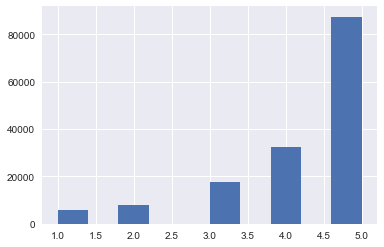

In [22]:
# Looking at the reviews

plt.hist(amazon.overall)
plt.show()

In [9]:
print(amazon.overall.value_counts())

5    87446
4    32598
3    17514
2     7917
1     5779
Name: overall, dtype: int64



Most of the reviews (58%) give 5 stars. This makes the determining if a review is 'postive' and 'negative' review somewhat difficult; particularly what does a 3 or 4 star review means in this context? Here I assume that anything less than a 5 star review is a negative review - as the reviewer would've found some fault with the product not to assign 5 stars. Note that this probably doesn't hold for all reviewers (some may only give 5 stars for a truly exceptional product) and of course every reviewer uses a different metric (e.g. value for money versus quality).

In [10]:
from sklearn import model_selection

# Create binary measure (only 5 stars is a good review)
amazon['goodreview'] = np.where(amazon.overall>4, 1, 0)

# Split out y
y = amazon.loc[:, 'goodreview']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

# Model 1: Naive Bayes

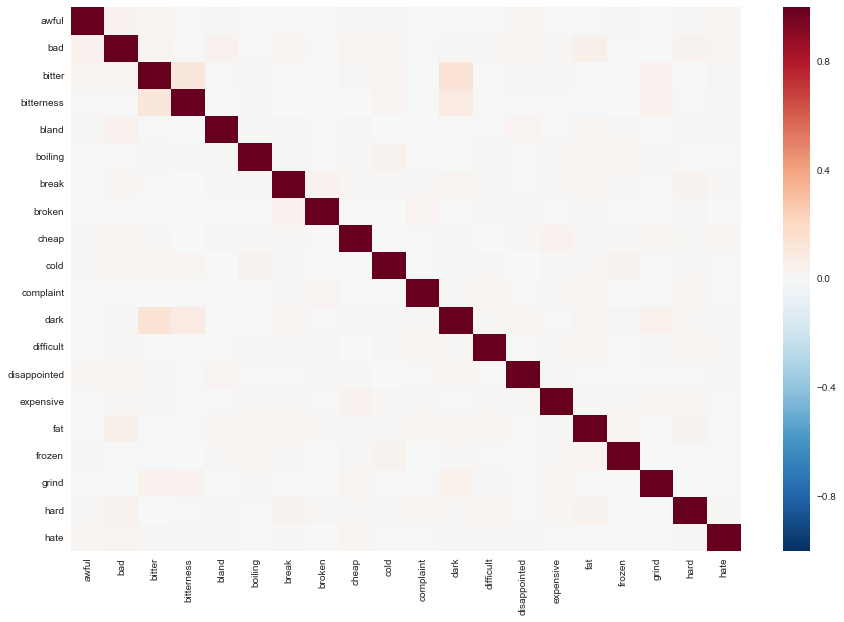

In [143]:
# Check (a slice) of assumptions
plt.figure(figsize=(15,10))
sns.heatmap(X.iloc[:, 0:20].corr())
plt.show()

In [11]:
from sklearn.naive_bayes import BernoulliNB

# from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Use on test data
y_hat = bnb.predict(X_test)
cross = pd.crosstab(y_hat, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
specificity = cross[0][0]/(cross[0][0] + cross[0][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)
print('Specificity is: ', specificity)

goodreview     0      1
row_0                  
0           8623   4123
1           7332  17736
Accuracy is:  0.697069868303
Sensitivity is:  0.811382039435
Specificity is:  0.540457536822


In [12]:
# Check CV use only accuracy
bnb = BernoulliNB()
cv = model_selection.cross_val_score(bnb, X, y, cv = 5)
print(cv)

[ 0.67701309  0.69025817  0.6967373   0.7187438   0.68704132]


## Model 2: Random forest classifier

In [18]:
# Gridsearch for optimal parameters

# Gridsearch to find optimal values of some of the hyperparameters
# Adjusting n_estimators to build more complex trees
# Not adjusting max_features - auto works best
# Adjusting min_sample_split to prevent overfitting (could also try max_depth or min_sample_leaf)

params = { "n_estimators" : [5,10,50,100]}

# Initialize the model
rf = ensemble.RandomForestClassifier()

# Apply GridSearch to the model
grid = model_selection.GridSearchCV(rf, params)

#Fit on train datase
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_pred_probs = grid.predict_proba(X_test)
table_pd = pd.DataFrame(pd.crosstab(y_pred, y_test, margins=True))
print(table_pd)

grid.best_estimator_

goodreview      0      1    All
row_0                          
0            8821   4975  13796
1            7134  16884  24018
All         15955  21859  37814


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [21]:
from sklearn import ensemble

# Create instance
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Testing prediction
y_hat = rf.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
specificity = cross[0][0]/(cross[0][0] + cross[0][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)
print('Specificity is: ', specificity)

goodreview     0      1
row_0                  
0           8860   4956
1           7095  16903
Accuracy is:  0.681308510076
Sensitivity is:  0.773274166247
Specificity is:  0.555311814478


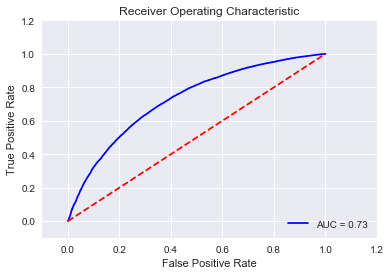

In [22]:
from sklearn import metrics 

# Getting ROC

preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
# Check CV use only accuracy
rf = ensemble.RandomForestClassifier()
cv = model_selection.cross_val_score(rf, X, y, cv = 5)
print(cv)

[ 0.65899775  0.65968067  0.66268884  0.67705785  0.65444628]


## Model 3: Gradient boosting

In [16]:
# Gradient boost with default hyperparameters
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Testing prediction
y_hat = gbc.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
specificity = cross[0][0]/(cross[0][0] + cross[0][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)
print('Specificity is: ', specificity)


goodreview     0      1
row_0                  
0           7587   3424
1           8368  18435
Accuracy is:  0.688157825144
Sensitivity is:  0.843359714534
Specificity is:  0.47552491382


In [ ]:
# Assume threshold of .5
threshold = np.where(y_hat>0.,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
specificity = cross[0][0]/(cross[0][0] + cross[0][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)
print('Specificity is: ', specificity)

In [17]:
# Check CV use only accuracy
gbc = ensemble.GradientBoostingClassifier()
gbc = model_selection.cross_val_score(gbc, X, y, cv = 5)
print(cv)

[ 0.65899775  0.65968067  0.66268884  0.67705785  0.65444628]


## Logistic regression

In [31]:
from sklearn import linear_model

# Running logit with Ridge penalty
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train)

# Getting predicted y from test
y_hat = logit.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
specificity = cross[0][0]/(cross[0][0] + cross[0][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)
print('Specificity is: ', specificity)

goodreview     0      1
row_0                  
0           8769   3870
1           7186  17989
Accuracy is:  0.707621515841
Sensitivity is:  0.822956219406
Specificity is:  0.549608273269


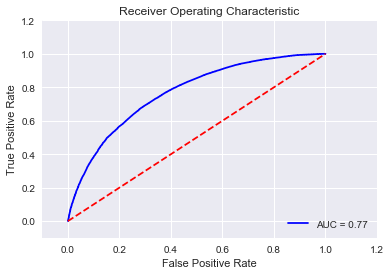

In [32]:
preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion

The models are surprisingly consistent in their accuracy, but there is some variance in specificity and precision. The accuracies of the models are still relatively low (between 0.68 and 0.7), particularly since the default strategy of always prediciting a good review has a 0.58 accuracy. However, given that the approach (matching a list of words and using this as a feature) cannot pick up any nuance or tone it may not be able to reach a much greater accuracy, although a more tailored list of words will get some gains. Using a more sophisticated approach (e.g. NLTK) is likely to get better results.

